Problem 1

In [39]:
import numpy as np
import math

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)
Y = 2 * np.random.randint(2, size=N) - 1
theta = np.random.randn(p)

def gradient():
  idx = math.floor(np.random.rand() * 30)
  _Y = Y[idx]
  _X = X[idx]
  _grad = np.asarray([ ( -1*_Y*_X[i]*(math.exp(-1*_Y*_X.T@theta)) ) / ( 1 + math.exp(-1*_Y*_X.T@theta) )  for i in range(0,p) ])
  return  _grad

# print(theta)
# theta -= gradient()
# print(theta)

cnt = 0
for i in range(N):
  if Y[i] == np.sign(X@theta)[i]:
    cnt += 1
print("accuracy before iteration : " + str(cnt / N))

for i in range(0,1000):
  theta = theta - 0.01 *gradient()
  theta = np.asarray( [round(theta[i], 5) for i in range(0,p)] )

cnt = 0
for i in range(N):
  if Y[i] == np.sign(X@theta)[i]:
    cnt += 1
print("accuracy after iteration : " + str(cnt / N))


accuracy before iteration : 0.5666666666666667
accuracy after iteration : 0.7


Problem 2

In [40]:
theta = np.random.randn(p)
lam = 0.1
changed = 0
cnt = 0

def fprime():
  idx = math.floor( np.random.rand() * N )
  _Y = Y[idx]
  _X = X[idx]
  global changed
  if 1-_Y*_X.T@theta < 0:
    return np.asarray( [2*lam*theta[i] for i in range(0,p)] ) 
  elif 1 - _Y*_X.T@theta == 0:
    cnt += 1
    print("non differentiable point!!!")
  else:
    return np.asarray( [-1*_Y*_X[i] + 2*lam*theta[i] for i in range(0,p) ])

for i in range(0,1000):
  _f = fprime()
  theta -= fprime()
  theta = np.asarray( [round(theta[i], 5) for i in range(0,p)] )

if (cnt > 0):
  print("SGD encounters a point of non-differentiability")
else:
  print("SGD doesn't encounter a point of non-differentiability")

SGD doesn't encounter a point of non-differentiability


Problem 3

[  6.6936387  -10.10285045   4.85716316  -8.42090387   3.56527639]


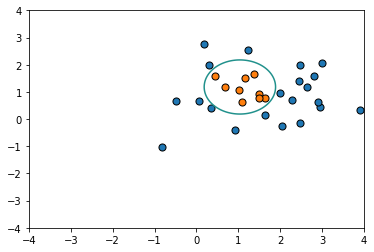

In [48]:
N=30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0,:]**2+X[1,:]**2-0.7) 
theta = 0.5
c, s = np.cos(theta), np.sin(theta) 
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]])
X_new = np.asarray([
    [1, X[0][i], X[0][i]**2, X[1][i], X[1][i]**2] for i in range(0,N)
])

idx_pos = []
idx_neg = []

for i in range(0,N):
  if (y[i] == 1):
    idx_pos.append(i)
  else:
    idx_neg.append(i)

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.scatter(X[0][idx_pos], X[1][idx_pos], s=50, facecolor='C0', edgecolor='k');
ax.scatter(X[0][idx_neg], X[1][idx_neg], s=50, facecolor='C1', edgecolor='k');

w = np.asarray([ np.random.uniform(-1,1) for i in range(5) ])

def gradient2():
  idx = math.floor(np.random.rand() * N)
  _Y = y[idx]
  _X_new = X_new[idx]
  _grad = np.asarray([ ( -1*_Y*_X_new[i]*(math.exp(-1*_Y*_X_new.T@w)) ) / ( 1 + math.exp(-1*_Y*_X_new.T@w) )  for i in range(0,5) ])
  return  _grad

for i in range(100000):
  w -= 0.01 * gradient2()


xx = np.linspace(-4, 4, 1024) 
yy = np.linspace(-4, 4, 1024) 
xx, yy = np.meshgrid(xx, yy)
Z = w[0] + (w[1] * xx + w[2] * xx**2) + (w[3] * yy + w[4] * yy**2) 
plt.contour(xx, yy, Z, 0)
print(w)

Problem7

gradually fits to True Fn


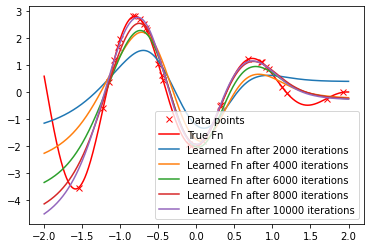

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :
    diff_b0 = sigmoid_prime(theta[0:p]*x + theta[p:2*p])*theta[2*p:3*p]
    diff_a0 = x * diff_b0
    diff_u0 = sigmoid(theta[0:p]*x + theta[p:2*p])
    return np.concatenate((diff_a0, diff_b0, diff_u0))

xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    idx = np.random.randint(N)
    Xk = X[idx]
    Yk = Y[idx]
    grad = (f_th(theta, Xk) - Yk) * diff_f_th(theta,Xk)
    theta -= alpha * grad
    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
# plt.show()
plt.savefig('plot.png')

print("gradually fits to True Fn")